In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
%matplotlib inline

### PROBLEM - 1
You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

Data Dictionary:

Variable Name	                                          Description

Carat	      :           Carat weight of the cubic zirconia.

Cut	          :           Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good,                              Premium, Ideal.

Color 	      :           Colour of the cubic zirconia.With D being the worst and J the best.

Clarity	      :           Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best in terms                            of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1

Depth	      :          The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle                              Diameter.

Table	      :          The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price	      :           the Price of the cubic zirconia.

X	         :            Length of the cubic zirconia in mm.

Y	         :            Width of the cubic zirconia in mm.

Z	         :            Height of the cubic zirconia in mm.

1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

##### Q-1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [2]:
cubic = pd.read_csv('cubic_zirconia.csv')
cubic.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [3]:
cubic.shape

(26967, 11)

In [4]:
cubic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


As the data information 
1. dataframe has 26967 rows and 11 columns.
2. There is missing value present in the data frame.
3. There are three types of data types present int64(2),float64(6),object(3)
4. All the columns datatype are correct as per their data so there no anamolies present in the data frame.
5. This dataframe consumes around 2.3+ MB for storage.

In [5]:
cubic=cubic.drop('Unnamed: 0',axis=1)

In [6]:
cubic.isnull().sum()


carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

There is only one column 'depth' which has missing values present in the dataframe.

In [7]:
cubic.duplicated().sum()

34

There are 34 duplicated rows present in the dataset and as these duplicate rows can influence the model performance, we need to to drop the dulicate rows from the dataframe.

In [8]:
cubic.drop_duplicates(inplace=True)

In [9]:
cubic.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26933.0,NaN,NaN,NaN,0.79801,0.477237,0.2,0.4,0.7,1.05,4.5
cut,26933,5,Ideal,10805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26933,7,G,5653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26933,8,SI1,6565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26236.0,NaN,NaN,NaN,61.745285,1.412243,50.8,61.0,61.8,62.5,73.6
table,26933.0,NaN,NaN,NaN,57.45595,2.232156,49.0,56.0,57.0,59.0,79.0
x,26933.0,NaN,NaN,NaN,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,NaN,NaN,NaN,5.733102,1.165037,0.0,4.71,5.7,6.54,58.9
z,26933.0,NaN,NaN,NaN,3.537769,0.719964,0.0,2.9,3.52,4.04,31.8
price,26933.0,NaN,NaN,NaN,3937.52612,4022.551862,326.0,945.0,2375.0,5356.0,18818.0


In [10]:
cubic[cubic['z']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


There are very few data points for which x,y and z values are zero. As these are the dimensions of the stones, they can be very important for predicting the price of stones, having values 0 for dimension might affect the model and price prediction.

As they just 8 rows out of 26933 rows which is not even 1 % of the entire row, so best option is to drop them rather than imputing.

In [11]:
cubic_num= ['carat','depth','table','x','y','z']

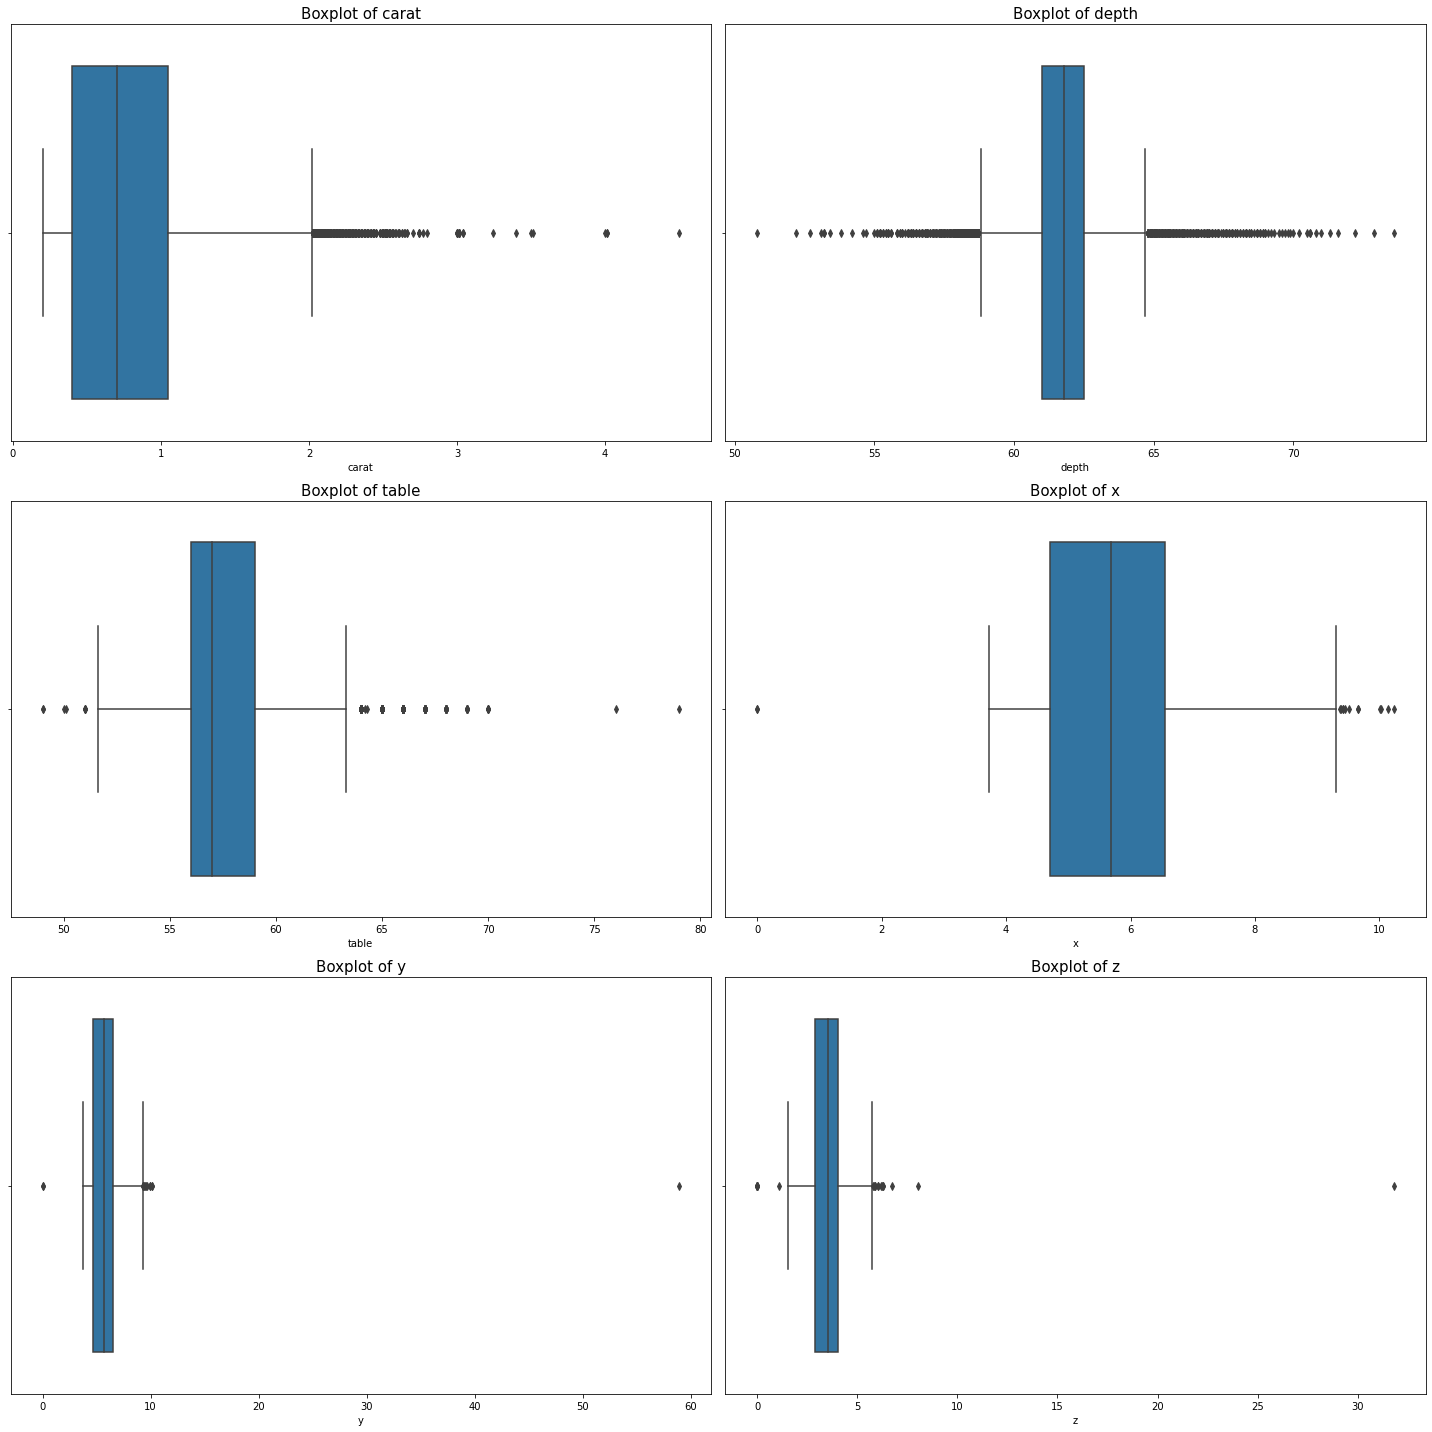

In [12]:
data_plot=cubic[['carat','depth','table','x','y','z']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(x=data_plot[data_plot.columns[i]])
    plt.title('Boxplot of {}'.format(data_plot.columns[i]),fontdict={'fontsize':15})
    plt.tight_layout()

C:\Users\home9\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\home9\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\home9\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

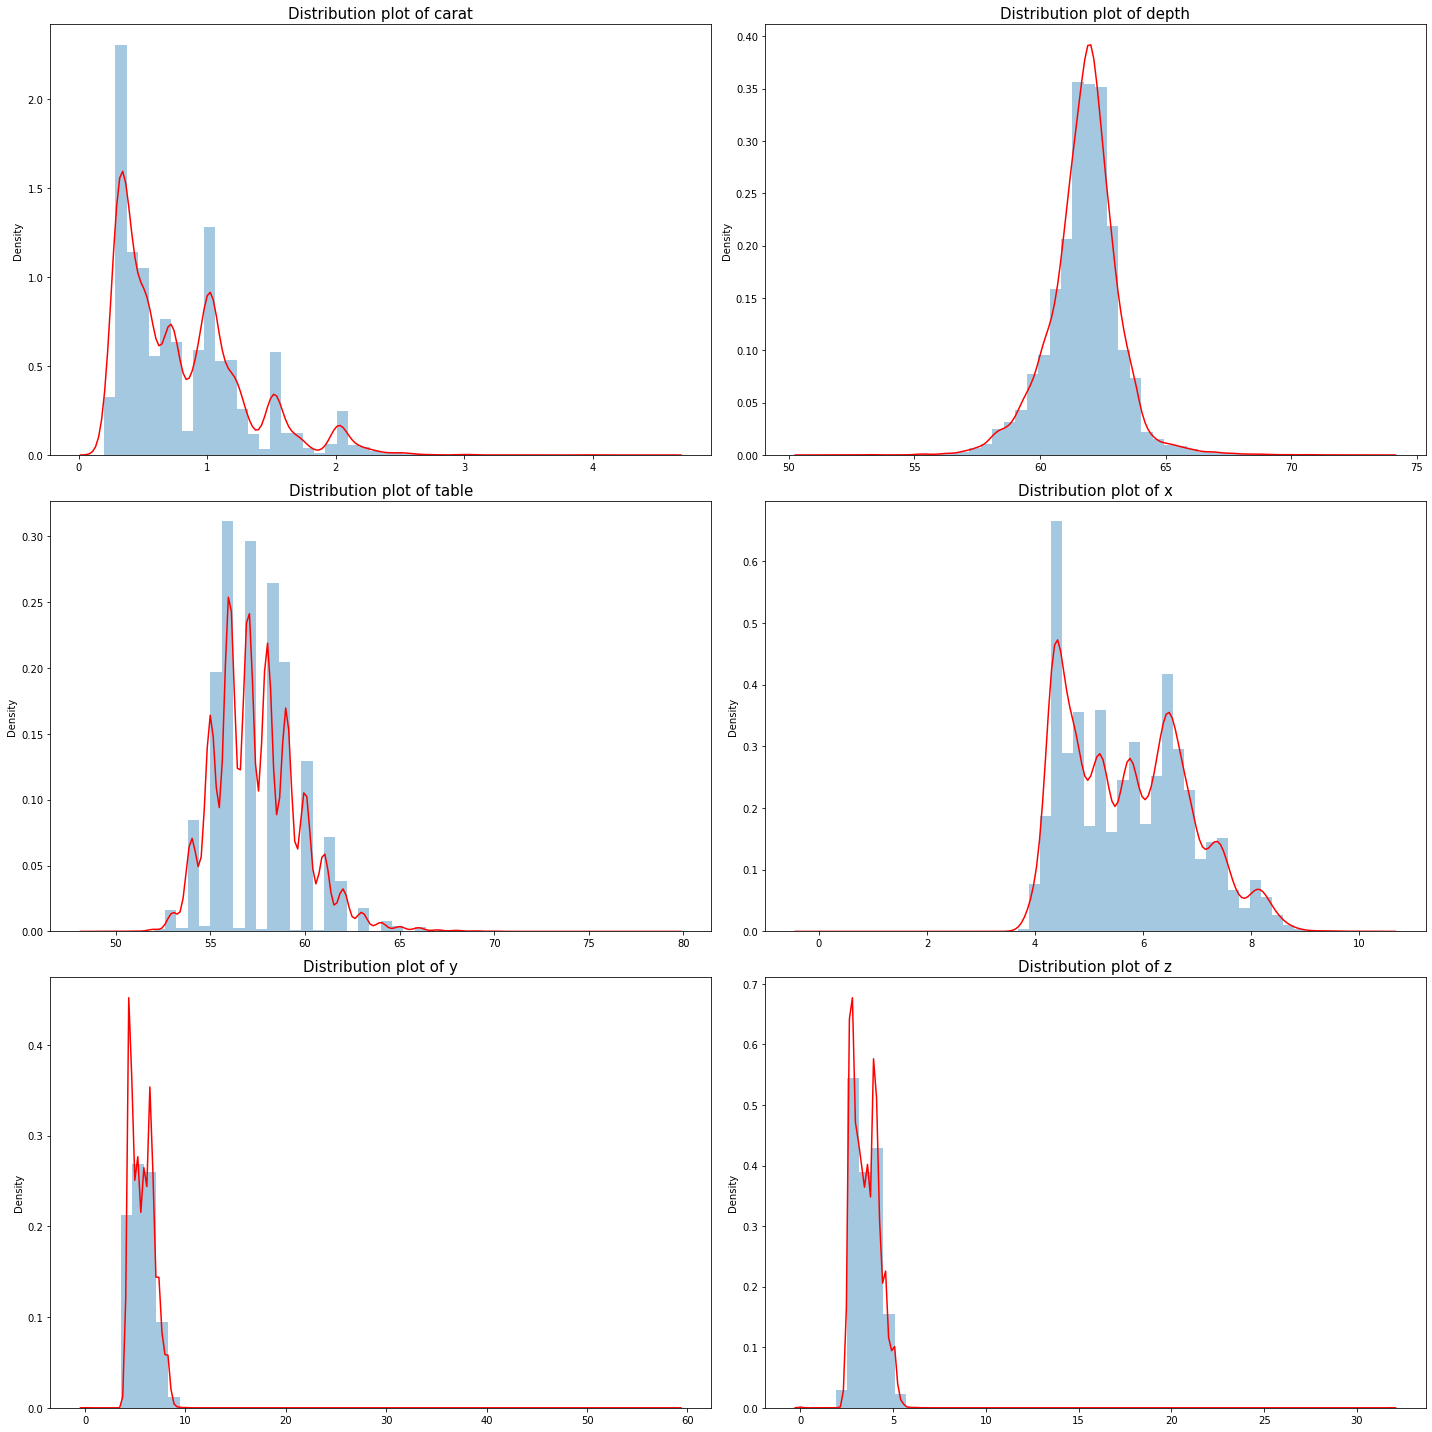

In [13]:
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.distplot(x=data_plot[data_plot.columns[i]],kde=True,norm_hist=True,
                 kde_kws={"color": "r", "lw": 1.5, "label": "KDE"})
    plt.title('Distribution plot of {}'.format(data_plot.columns[i]),fontdict={'fontsize':15})
    plt.tight_layout();

In [14]:
from scipy.stats import skew
for i in cubic_num:
    a = cubic[i].skew()
    print('Skewness of',i,'is',a)

Skewness of carat is 1.114789102547177
Skewness of depth is -0.026085960544075602
Skewness of table is 0.7658050724889769
Skewness of x is 0.39228983097563763
Skewness of y is 3.8677640870625782
Skewness of z is 2.5806646675426226


The above plot and stats represents,
1. The distribution of depth columnn is almost normal as its skewness value os almost near to zero.
2. The X column is moderately right skewed.
3. Rest all the columns are highly right skewed.

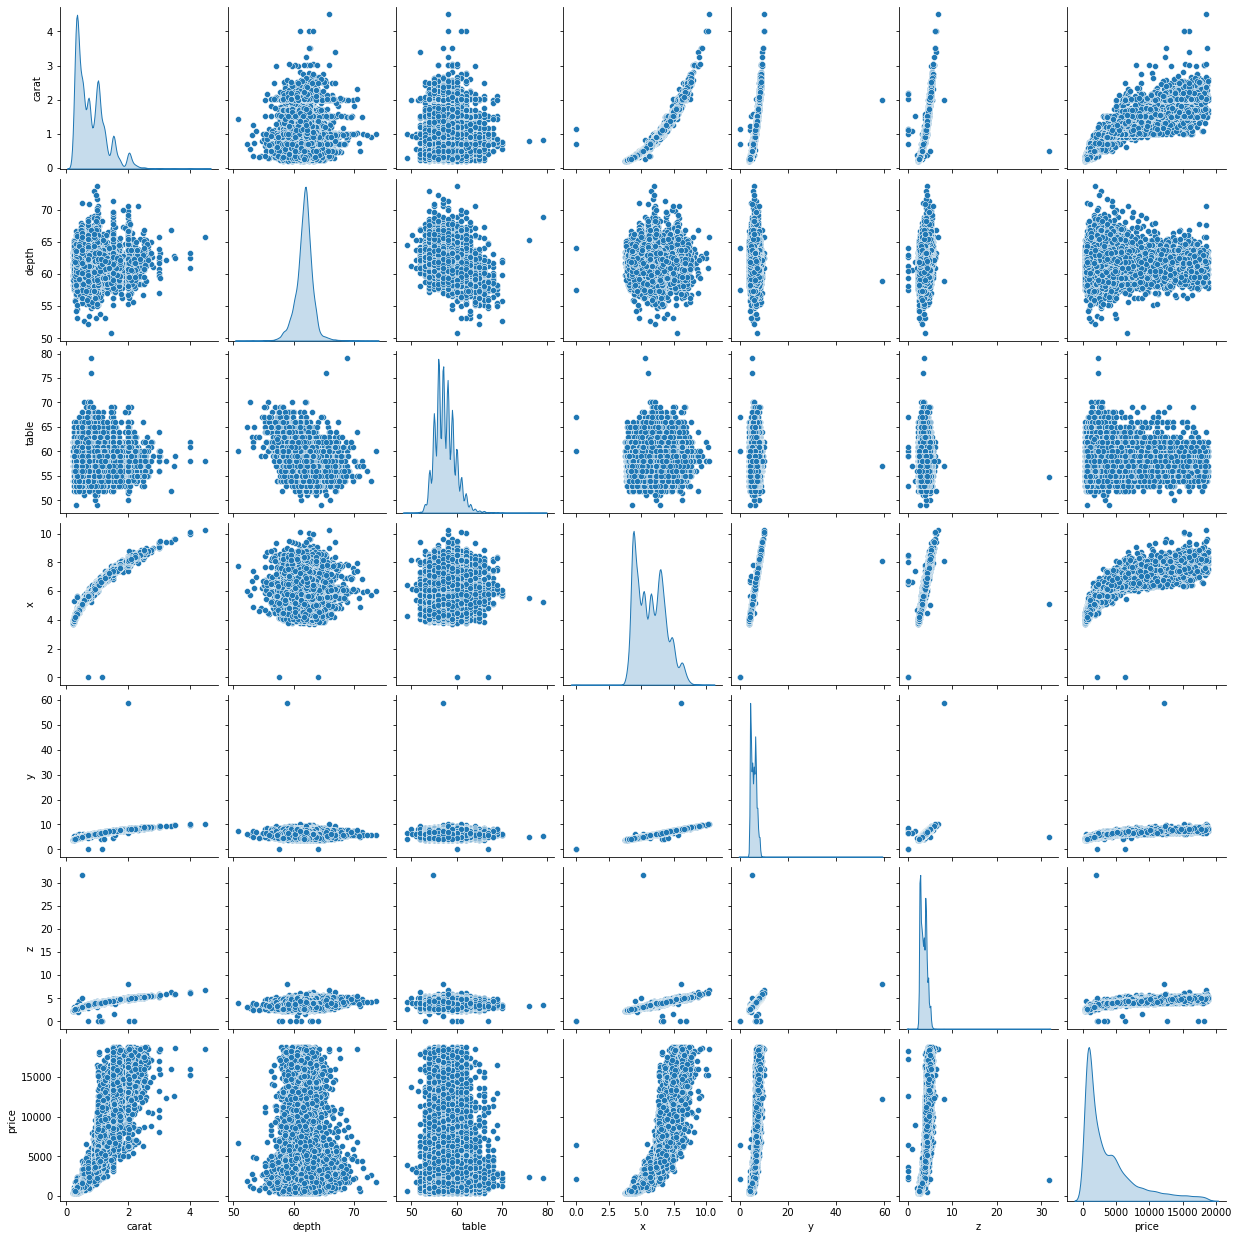

In [15]:
sns.pairplot(cubic,diag_kind='kde')

From the pair plot we can check that,
1. Price is having linear relation with many indepentdent variable such as X,Y,Z and CARAT.
2. CARAT is also highly related with X,Y,Z.
3. THese relation indicates that these variables might play very important role in predicting the prices of the stones.

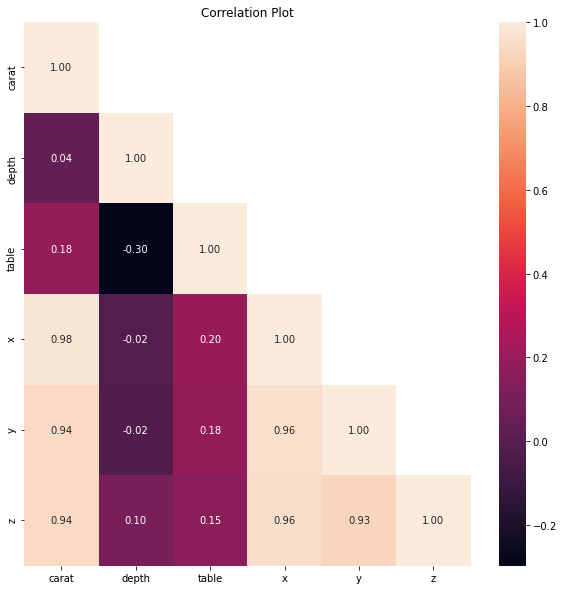

In [16]:
corr=cubic.iloc[:,0:9].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt='.2f',mask=np.triu(corr,+1))
plt.title('Correlation Plot');

From the Correlation plot we can infer the same result as of pair plot 
1. PRICE is highly correlated with X,Y,Z and CARAT, so can be good predictors for price.
2. CARAT is also highly correlated with X,Y,Z by which we can assume that higher the dimension of stones higher the carat.


In [17]:
for feature in cubic.columns: 
    if cubic[feature].dtype == 'object': 
        print(feature)
        print(cubic[feature].value_counts())
        print('\n')

cut
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64


color
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64




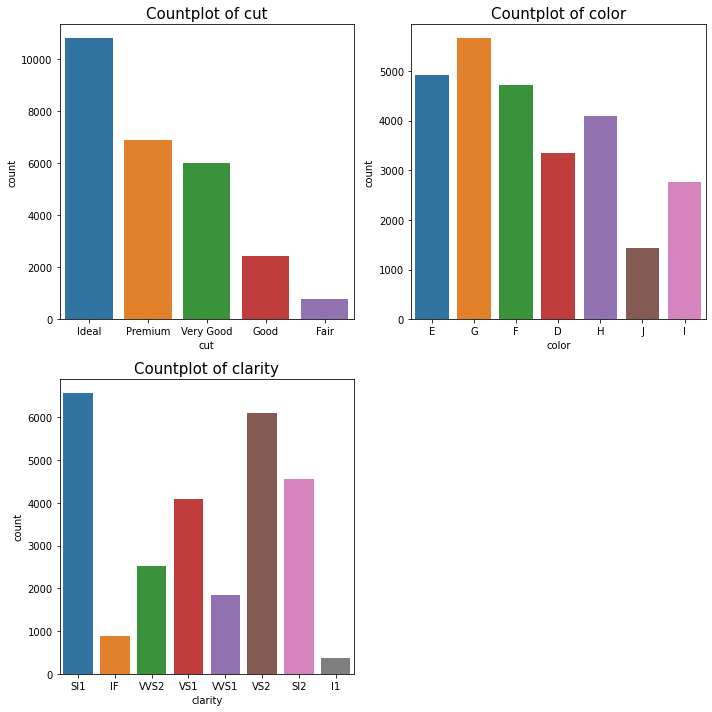

In [18]:
data=cubic[['cut','color','clarity']]
fig=plt.figure(figsize=(10,10))
for i in range(0,len(data.columns)):
    ax=fig.add_subplot(2,2,i+1)
    sns.countplot(x=data[data.columns[i]])
    plt.title('Countplot of {}'.format(data.columns[i]),fontdict={'fontsize':15})
    plt.tight_layout()

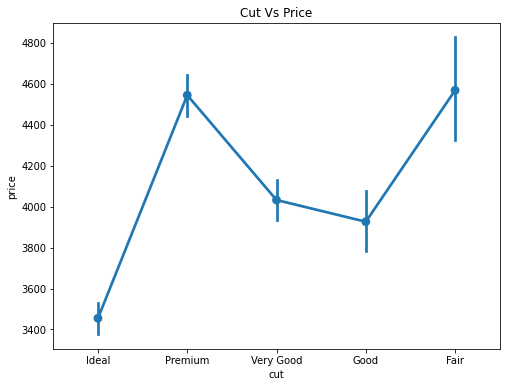

In [19]:
plt.figure(figsize=(8,6))
sns.pointplot(x='cut',y='price',data=cubic)
plt.title('Cut Vs Price');

From The above plot we can check that,

Ideal being the best cut amongst other has the lowest average price as compare to other and on the other hand fair amognst the lowest as per cut has the highest average price.

In [20]:
cubic.groupby('cut')['price'].mean()

cut
Fair         4568.096154
Good         3926.336756
Ideal        3454.820639
Premium      4544.558525
Very Good    4032.267961
Name: price, dtype: float64

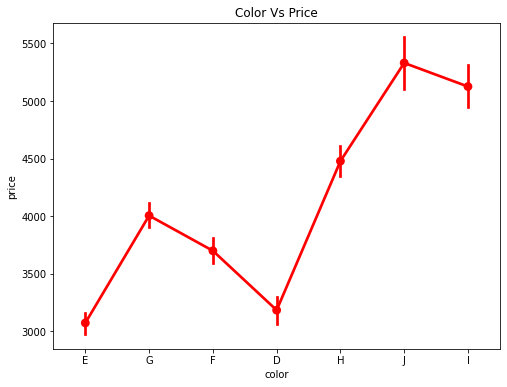

In [21]:
plt.figure(figsize=(8,6))
sns.pointplot(x='color',y='price',data=cubic,color='red')
plt.title('Color Vs Price');

In [22]:
cubic.groupby('color')['price'].mean()

color
D    3184.827597
E    3073.940399
F    3699.944527
G    4005.046170
H    4477.932112
I    5124.816637
J    5329.706250
Name: price, dtype: float64

As the order of color of stones goes from lower to higher ( D --> J) the average price also increase with the quality if color.

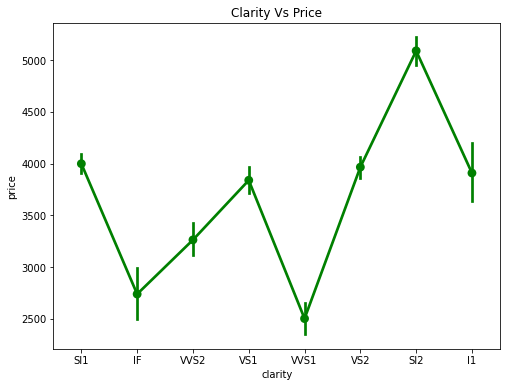

In [23]:
plt.figure(figsize=(8,6))
sns.pointplot(x='clarity',y='price',data=cubic,color='green')
plt.title('Clarity Vs Price');

Same as Color as the quality of clarity of stones increasing so dos the price of the stones.

In [24]:
cubic.groupby('clarity')['price'].mean()

clarity
I1      3908.750000
IF      2739.534231
SI1     3998.635644
SI2     5088.869413
VS1     3838.752386
VS2     3965.496964
VVS1    2502.874388
VVS2    3263.042688
Name: price, dtype: float64

<AxesSubplot:xlabel='carat', ylabel='price'>

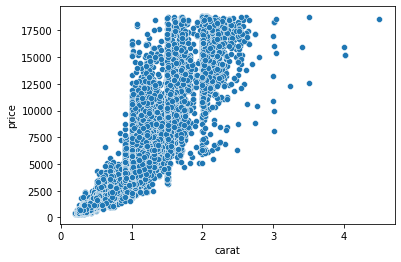

In [25]:
sns.scatterplot(x='carat',y='price',data=cubic)

##### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

#### IMPUTING THE MISSING VALUES



In [26]:
Q1 = cubic.quantile(0.25)
Q3 = cubic.quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

In [27]:
lower_range

carat      -0.575
depth      58.750
table      51.500
x           1.950
y           1.965
z           1.190
price   -5671.500
dtype: float64

In [28]:
upper_range

carat        2.025
depth       64.750
table       63.500
x            9.310
y            9.285
z            5.750
price    11972.500
dtype: float64

In [29]:
cubic['carat']=np.where(cubic['carat']>2.025,2.025,cubic['carat'])
cubic['carat']=np.where(cubic['carat']<-0.575,-0.575,cubic['carat'])
cubic['depth']=np.where(cubic['depth']>64.75,64.75,cubic['depth'])
cubic['depth']=np.where(cubic['depth']<58.75,58.75,cubic['depth'])
cubic['table']=np.where(cubic['table']<51.500,51.500,cubic['table'])
cubic['table']=np.where(cubic['table']>63.500,63.500,cubic['table'])
cubic['x']=np.where(cubic['x']<1.950,1.950,cubic['x'])
cubic['x']=np.where(cubic['x']>9.310,9.310,cubic['x'])
cubic['y']=np.where(cubic['y']<1.965,1.965,cubic['y'])
cubic['y']=np.where(cubic['y']>9.285,9.285,cubic['y'])
cubic['z']=np.where(cubic['z']<1.190,1.190,cubic['z'])
cubic['z']=np.where(cubic['z']>5.750,5.750,cubic['z'])

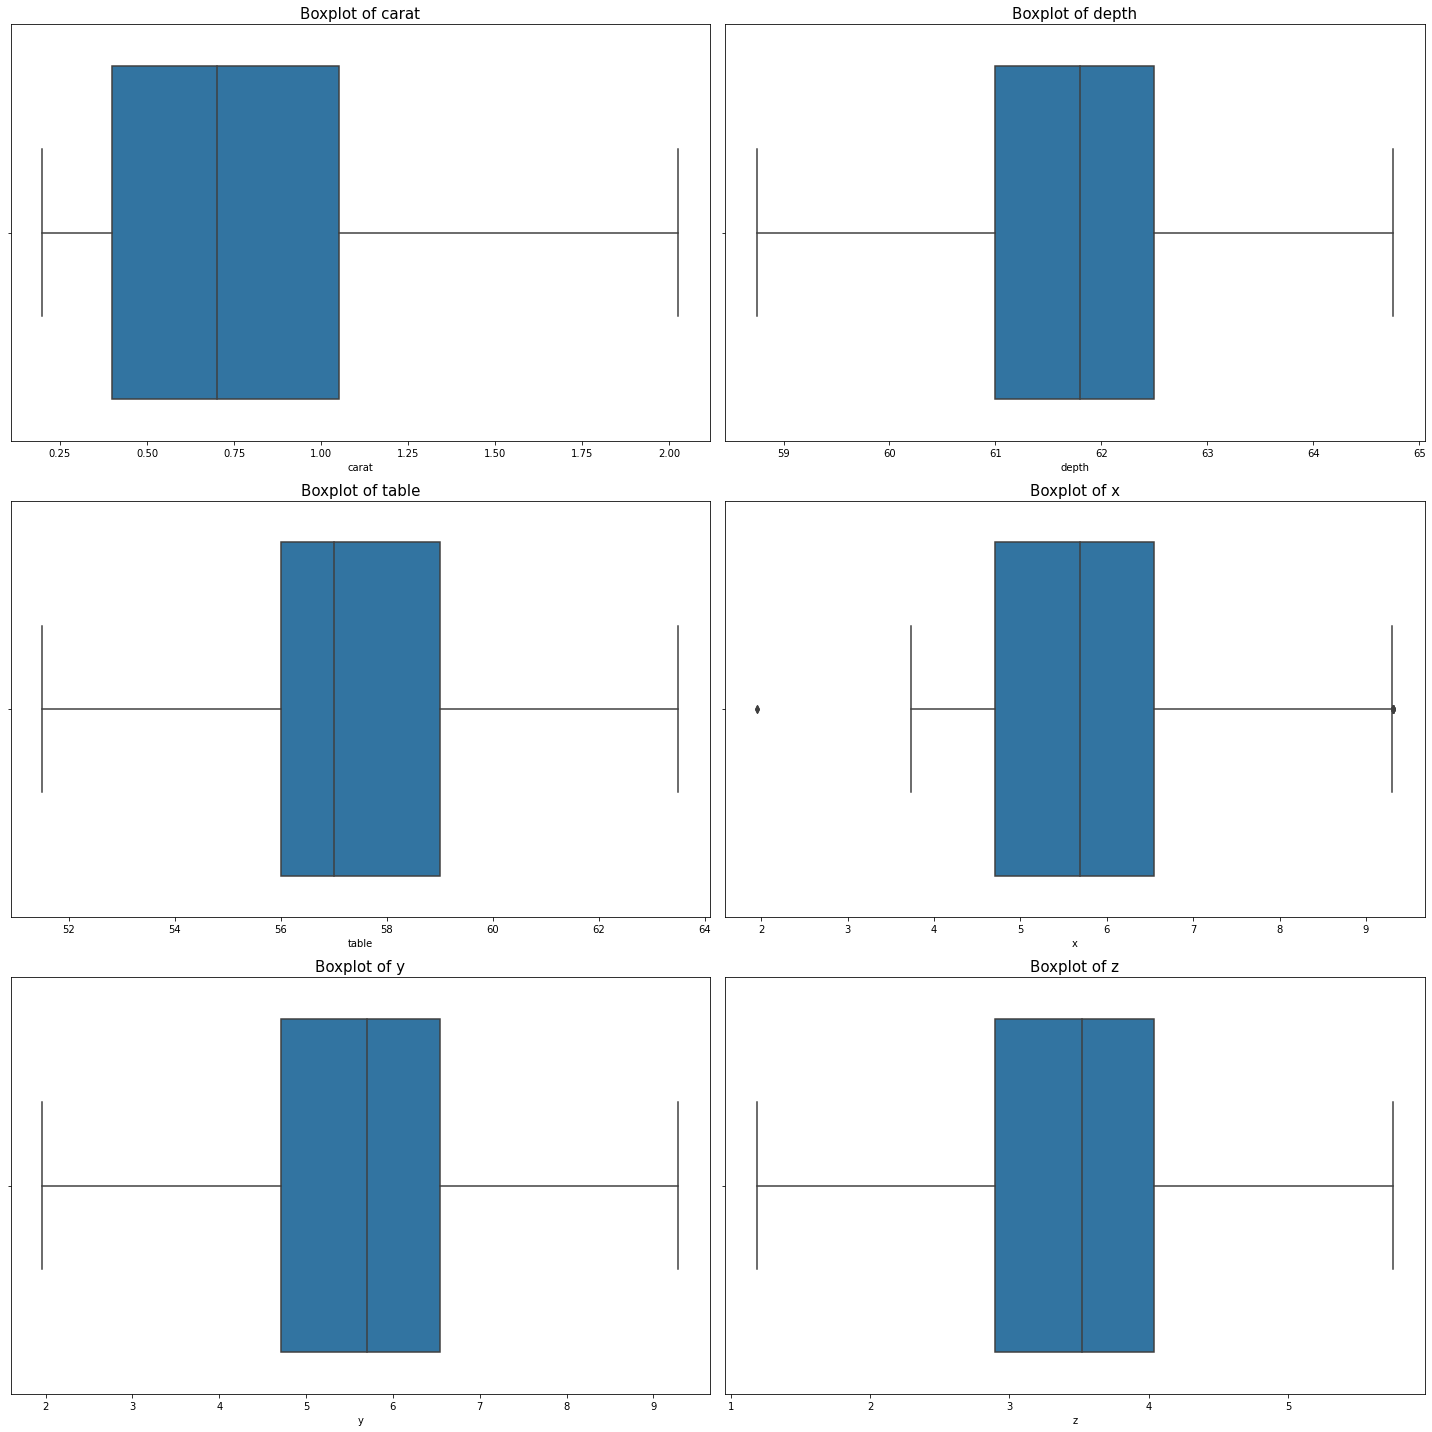

In [30]:
data_plot=cubic[['carat','depth','table','x','y','z']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(x=data_plot[data_plot.columns[i]])
    plt.title('Boxplot of {}'.format(data_plot.columns[i]),fontdict={'fontsize':15})
    plt.tight_layout()

In [31]:
mean= cubic.depth.mean()
cubic.depth = cubic.depth.fillna(value = mean)

In [32]:
cubic.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

As there are outliers present in the data, we have treated the outliers. So we will impute the missing values with mean.

#### Checking Values which are Zero

In [33]:
cubic[(cubic['z']==0) | (cubic['x']==0) | (cubic['y']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price


As we trated outliers the min value 0 that was present in the data was changed with lower limit as we treated the outliers

In [34]:
cubic.shape

(26933, 10)

In [35]:
cubic= cubic.drop(cubic[(cubic['z']==0) | (cubic['x']==0) | (cubic['y']==0)].index)
cubic.shape

(26933, 10)

##### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

#### Converting CAtegorical Data into numerical 
Starting 1 as worst

In [36]:
cubic['cut']=np.where(cubic['cut']=='Fair','1',cubic['cut'])
cubic['cut']=np.where(cubic['cut']=='Good','2',cubic['cut'])
cubic['cut']=np.where(cubic['cut']=='Very Good','3',cubic['cut'])
cubic['cut']=np.where(cubic['cut']=='Premium','4',cubic['cut'])
cubic['cut']=np.where(cubic['cut']=='Ideal','5',cubic['cut'])

In [37]:
cubic.cut.value_counts()

5    10805
4     6886
3     6027
2     2435
1      780
Name: cut, dtype: int64

In [38]:
cubic['color']=np.where(cubic['color']=='D','1',cubic['color'])
cubic['color']=np.where(cubic['color']=='E','2',cubic['color'])
cubic['color']=np.where(cubic['color']=='F','3',cubic['color'])
cubic['color']=np.where(cubic['color']=='G','4',cubic['color'])
cubic['color']=np.where(cubic['color']=='H','5',cubic['color'])
cubic['color']=np.where(cubic['color']=='I','6',cubic['color'])
cubic['color']=np.where(cubic['color']=='J','7',cubic['color'])

In [39]:
cubic.color.value_counts()

4    5653
2    4916
3    4723
5    4095
1    3341
6    2765
7    1440
Name: color, dtype: int64

In [40]:
cubic['clarity']=np.where(cubic['clarity']=='IF','1',cubic['clarity'])
cubic['clarity']=np.where(cubic['clarity']=='VVS1','2',cubic['clarity'])
cubic['clarity']=np.where(cubic['clarity']=='VVS2','3',cubic['clarity'])
cubic['clarity']=np.where(cubic['clarity']=='VS1','4',cubic['clarity'])
cubic['clarity']=np.where(cubic['clarity']=='VS2','5',cubic['clarity'])
cubic['clarity']=np.where(cubic['clarity']=='SI1','6',cubic['clarity'])
cubic['clarity']=np.where(cubic['clarity']=='SI2','7',cubic['clarity'])
cubic['clarity']=np.where(cubic['clarity']=='I1','8',cubic['clarity'])

In [41]:
cubic.clarity.value_counts()

6    6565
5    6093
7    4564
4    4087
3    2530
2    1839
1     891
8     364
Name: clarity, dtype: int64

There are two types of categorical data

Ordinal: Order based like 'good','bad','worst' or Clothing sizes

Nominal: Without any order or ranks like city names, Genders, etc

Here, for now let us convert these into Categorical becuse there are some ordinal data and to avoid high dimensionality because of OHE(get_dummies)

In [42]:
cubic['cut'] = cubic['cut'].astype('int64')
cubic['color'] = cubic['color'].astype('int64')
cubic['clarity'] = cubic['clarity'].astype('int64')
cubic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int64  
 2   color    26933 non-null  int64  
 3   clarity  26933 non-null  int64  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 3.3 MB


##### Splitting the data into Train and Test

In [43]:
X=cubic.drop('price',axis=1)
y= cubic.pop('price')

In [44]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,5,2,6,62.1,58.0,4.27,4.29,2.66
1,0.33,4,4,1,60.8,58.0,4.42,4.46,2.70
2,0.90,3,2,3,62.2,60.0,6.04,6.12,3.78
3,0.42,5,3,4,61.6,56.0,4.82,4.80,2.96
4,0.31,5,3,2,60.4,59.0,4.35,4.43,2.65


In [45]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [46]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (18853, 9)
X_test (8080, 9)
y_train (18853,)
y_test (8080,)


##### Creating Linear Regression Model

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [48]:
LR = LinearRegression()

In [49]:
model_regression = LR.fit(X_train,y_train)

In [50]:
model_regression.coef_

array([13531.59788166,   135.2292318 ,  -333.26079465,  -485.11311006,
         -50.07579963,   -27.20710666, -2589.39888901,  1301.4600615 ,
        -910.89090982])

In [51]:
model_regression.intercept_

11530.753733533054

In [52]:
model_regression.score(X_train,y_train)

0.9160069962537474

In [53]:
model_regression.score(X_test,y_test)

0.9180986254946182

In [54]:
ytrain_predict = model_regression.fit(X_train,y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,ytrain_predict))

1162.002805982933

In [55]:
ytest_predict = model_regression.fit(X_test,y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,ytest_predict))

1158.8243533665964

#### Creating Model Using stats

In [56]:
import statsmodels.formula.api as smf

In [57]:
data_train = pd.concat([X_train,y_train],axis=1)
data_test = pd.concat([X_test,y_test],axis=1)

In [58]:
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
22114,0.34,3,5,5,62.4,60.0,4.41,4.44,2.76,537
2275,0.30,5,2,5,61.2,55.0,4.35,4.31,2.65,844
19183,0.50,5,4,6,62.5,57.0,5.09,5.05,3.17,1240
5030,1.10,2,2,7,63.3,56.0,6.53,6.58,4.15,4065
25414,1.02,4,3,7,61.1,62.0,6.54,6.49,3.98,4057


In [59]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [60]:
expr = 'price ~ carat + cut + color + clarity + depth + table + x + y + z'

In [61]:
lm = smf.ols(formula = expr, data=data_train).fit()

In [62]:
lm.params

Intercept    11530.753734
carat        13531.597882
cut            135.229232
color         -333.260795
clarity       -485.113110
depth          -50.075800
table          -27.207107
x            -2589.398889
y             1301.460062
z             -910.890910
dtype: float64

In [63]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 2.283e+04
Date:                Wed, 22 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:05:06   Log-Likelihood:            -1.5981e+05
No. Observations:               18853   AIC:                         3.196e+05
Df Residuals:                   18843   BIC:                         3.197e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.153e+04    889.686     12.960      0.0

By the above model summary 

we can say that overall p value is less, so we fail to accept the null hypothesis (H0) and accepting alternative hypothesis(H1) that atleast one  

In [64]:
mse_train = np.mean((lm.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [65]:
np.sqrt(mse_train)

1162.002805982929

In [66]:
mse_test = np.mean((lm.predict(data_test.drop('price',axis=1))-data_test['price'])**2)
np.sqrt(mse_test)

1159.813186718636

In [67]:
ytest_predict_stat = lm.predict(data_test)
ytest_predict_stat

16997     6627.065621
24457     4255.187134
16612     9880.300431
308       3939.409123
26652    14638.723351
             ...     
25016     1202.692318
8485      6076.086375
26891     4788.175887
17455     4114.835813
26169     4566.889192
Length: 8080, dtype: float64

In [68]:
y_test

16997     5292
24457     4484
16612    11649
308       3316
26652    13043
         ...  
25016     1033
8485      6522
26891     4592
17455     4642
26169     4558
Name: price, Length: 8080, dtype: int64

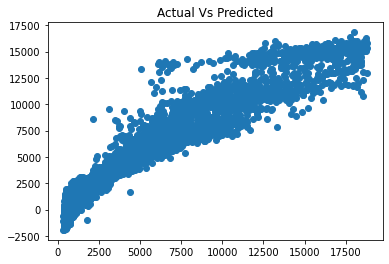

In [69]:
plt.scatter(y_test,ytest_predict_stat)
plt.title('Actual Vs Predicted')
plt.show();

### Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

#### Data Dictionary:

Variable Name       ---	Description

Holiday_Package    --- 	 Opted for Holiday Package yes/no?

Salary            ---  	 Employee salary

age                --- 	 Age in years

edu 	          ---       Years of formal education

no_young_children ---	     The number of young children (younger than 7 years)

no_older_children 	---     Number of older children

foreign 	        ---     foreigner Yes/No

2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

2.4 Inference: Basis on these predictions, what are the insights and recommendations.

Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

##### Q-2.1. Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [70]:
holiday = pd.read_csv('Holiday_Package.csv')
holiday.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [71]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


1. There 872 rows and 08 columns present in the dataframe.
2. There are no null values present in dataframe.
3. There are two types of datatype present int64(6),objet(2)
4. As all the datatype is correct as per the data so there are no annamolies in the dataframe.
5. The memory usage for this dataframe is 54.6+ KB.

In [72]:
# Unnamed:0 is just redundant column which gives the index of the observations so dropping it.
holiday.drop('Unnamed: 0',axis=1,inplace=True)


In [73]:
holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [74]:
holiday.duplicated().sum()

0

There are no dulicate rows present in the dataframe.

In [75]:
holiday.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. The higher percentage of employees around 54% has not bought the company's holiday package.
2. There are low as wells as high package salary employees in the company as their salary ranges from 1300 to 236961.
3. The minimum age of an employee is 20 years and maximum 62 years.
4. THe are some good wducated employees working in the company as education years ranges from 1 to 21 years.
5. Maximum number of young(> 7 years) children that employees have is 3.
6. There are 25 % of employees working in the company are foreigners.

C:\Users\home9\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\home9\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\home9\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

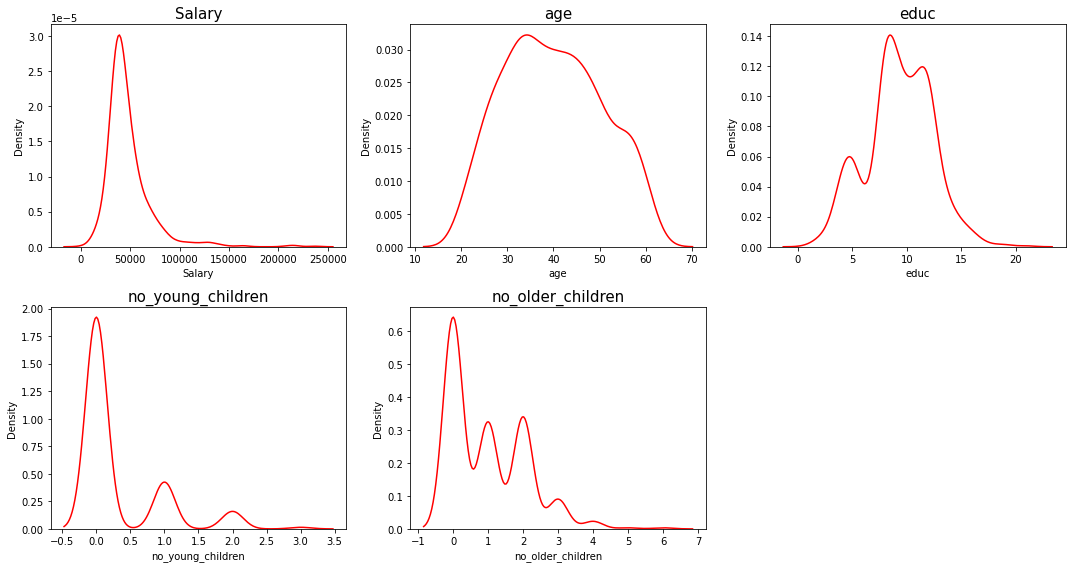

In [76]:
holiday_num=holiday[['Salary','age','educ','no_young_children','no_older_children']]
fig=plt.figure(figsize=(15,8))
for i in range(0,len(holiday_num.columns)):
    ax=fig.add_subplot(2,3,i+1)
    sns.distplot(holiday_num[holiday_num.columns[i]],hist=False,color='Red')
    ax.set_title(holiday_num.columns[i],color='black',fontdict={'fontsize':15})
plt.tight_layout()
plt.show();

In [77]:
from scipy.stats import skew
print('Skewness of Salary is',holiday.Salary.skew())
print('Skewness of Age is',holiday.age.skew())
print('Skewness of Educ is',holiday.educ.skew())
print('Skewness of no_young_children is',holiday.no_young_children.skew())
print('Skewness of no_older_children is',holiday.no_older_children.skew())

Skewness of Salary is 3.103215542323346
Skewness of Age is 0.1464120059496387
Skewness of Educ is -0.045501475549558336
Skewness of no_young_children is 1.946514578433618
Skewness of no_older_children is 0.9539514741197574


As we can see from the plot and the stats
1. Age and Educ have value near to 0 so they have very light skewness and we can assume they are normally distributed.
2. Salary is very highly right skewed as its skewness value is very high.
3. Number of children column are expected to have skewness as some employees has customer but some doesn't.

C:\Users\home9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home9\anaconda3\lib\si

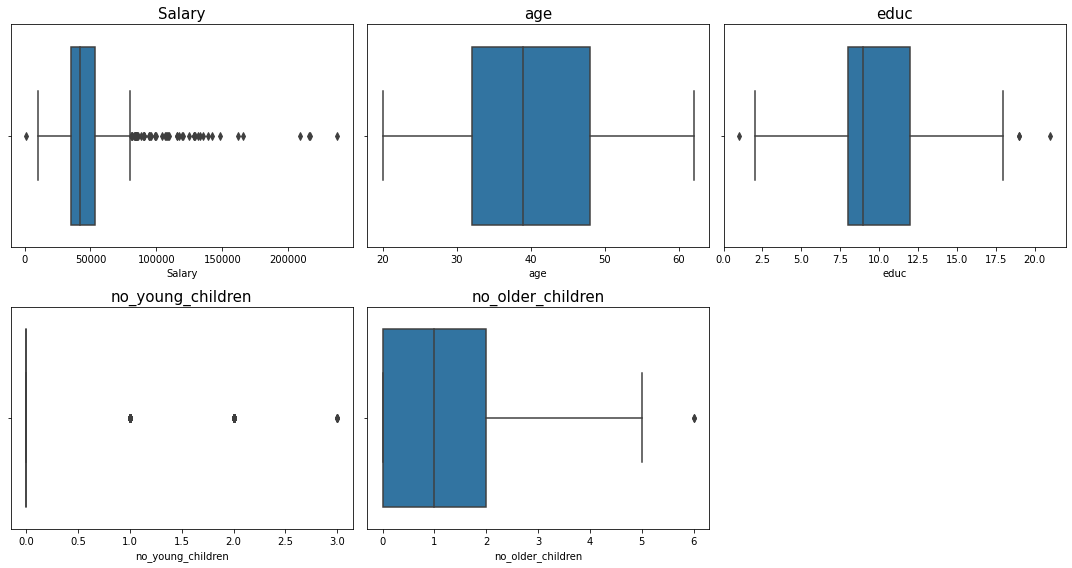

In [78]:
fig=plt.figure(figsize=(15,8))
for i in range(0,len(holiday_num.columns)):
    ax=fig.add_subplot(2,3,i+1)
    sns.boxplot(holiday_num[holiday_num.columns[i]])
    ax.set_title(holiday_num.columns[i],color='black',fontdict={'fontsize':15})
plt.tight_layout()
plt.show();

As expected from the data description also 
1. Salary has too many outliers.
2. Rest all other numerical variables has very less number of outliers.

C:\Users\home9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


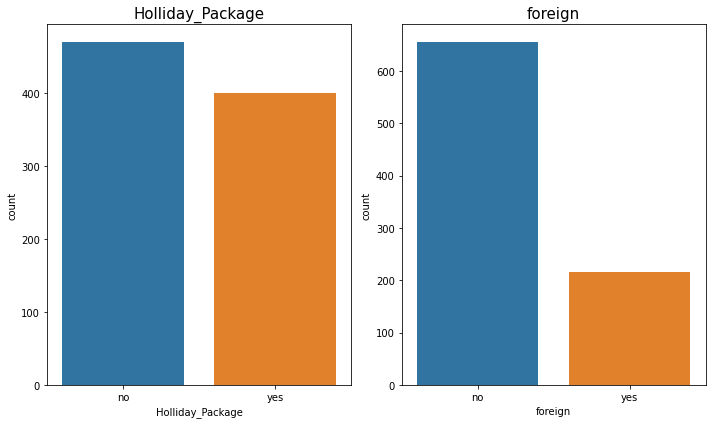

In [79]:
holiday_cat=holiday[['Holliday_Package','foreign']]
fig=plt.figure(figsize=(10,6))
for i in range(0,len(holiday_cat.columns)):
    ax=fig.add_subplot(1,2,i+1)
    sns.countplot(holiday_cat[holiday_cat.columns[i]])
    ax.set_title(holiday_cat.columns[i],color='black',fontdict={'fontsize':15})
plt.tight_layout()
plt.show();

As we can see from the plots
1. THere are higher percentage of employees who has not bought the company's holiday packages.
2. THere are more 75 % local and 25 % of foreigner employees work in the company.

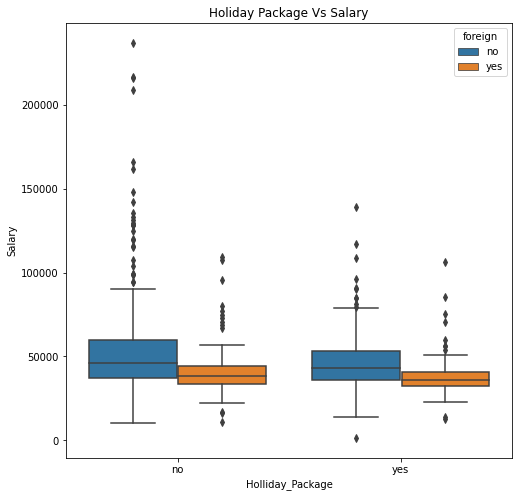

In [80]:
plt.figure(figsize=(8,8))
sns.boxplot(y=holiday['Salary'],x=holiday['Holliday_Package'],hue=holiday['foreign'])
plt.title('Holiday Package Vs Salary');

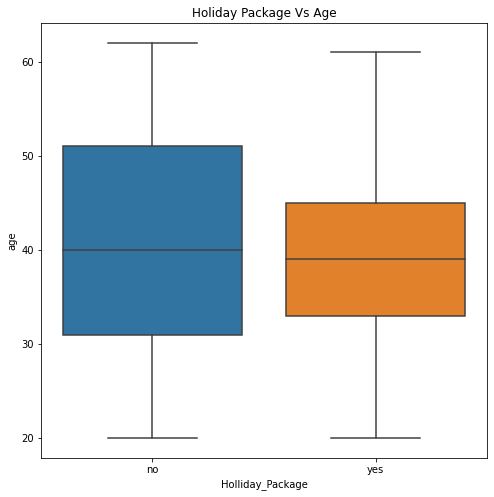

In [81]:
plt.figure(figsize=(8,8))
sns.boxplot(y='age',x='Holliday_Package',data=holiday)
plt.title('Holiday Package Vs Age');

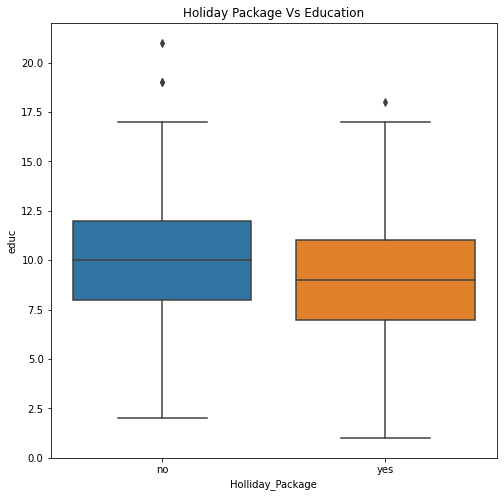

In [82]:
plt.figure(figsize=(8,8))
sns.boxplot(y=holiday['educ'],x=holiday['Holliday_Package'])
plt.title('Holiday Package Vs Education');

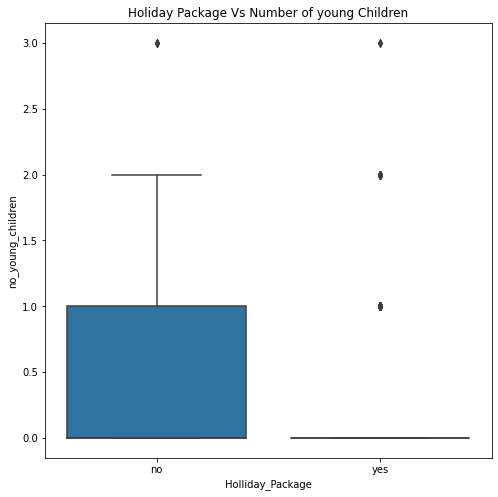

In [83]:
plt.figure(figsize=(8,8))
sns.boxplot(y=holiday['no_young_children'],x=holiday['Holliday_Package'])
plt.title('Holiday Package Vs Number of young Children');

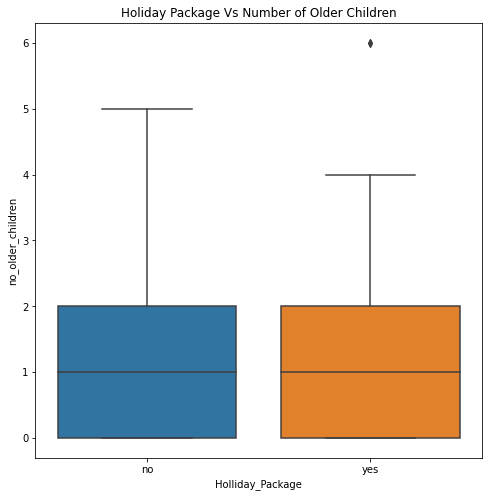

In [84]:
plt.figure(figsize=(8,8))
sns.boxplot(y=holiday['no_older_children'],x=holiday['Holliday_Package'])
plt.title('Holiday Package Vs Number of Older Children');

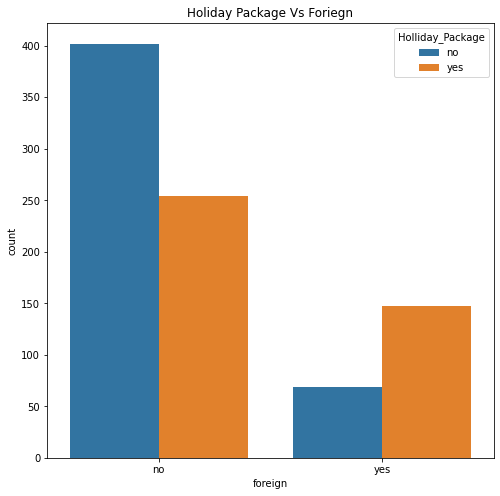

In [85]:
plt.figure(figsize=(8,8))
sns.countplot(x=holiday.foreign,hue=holiday.Holliday_Package)
plt.title('Holiday Package Vs Foriegn');

As we can check from above plots,
1. The median and distribution of employees salary who have purchased the package(yes) and who have not purchase(no) are slight different, so Salary can be an influncer for descision making.
2. The age median values of yes and no employees are same, so age might not be a good factor.
3. employees has less year of education are more likely to buy the holiday package.
4. Employess who have younger children(> 3 years) are less likely to buy holiday package.
5. Employees having older children does not make influnce whether to but a holiday package or not.
6. As there are only 25 % fireign employees in the company but still amongst them there is hogher percentage of employess buying holiday package.

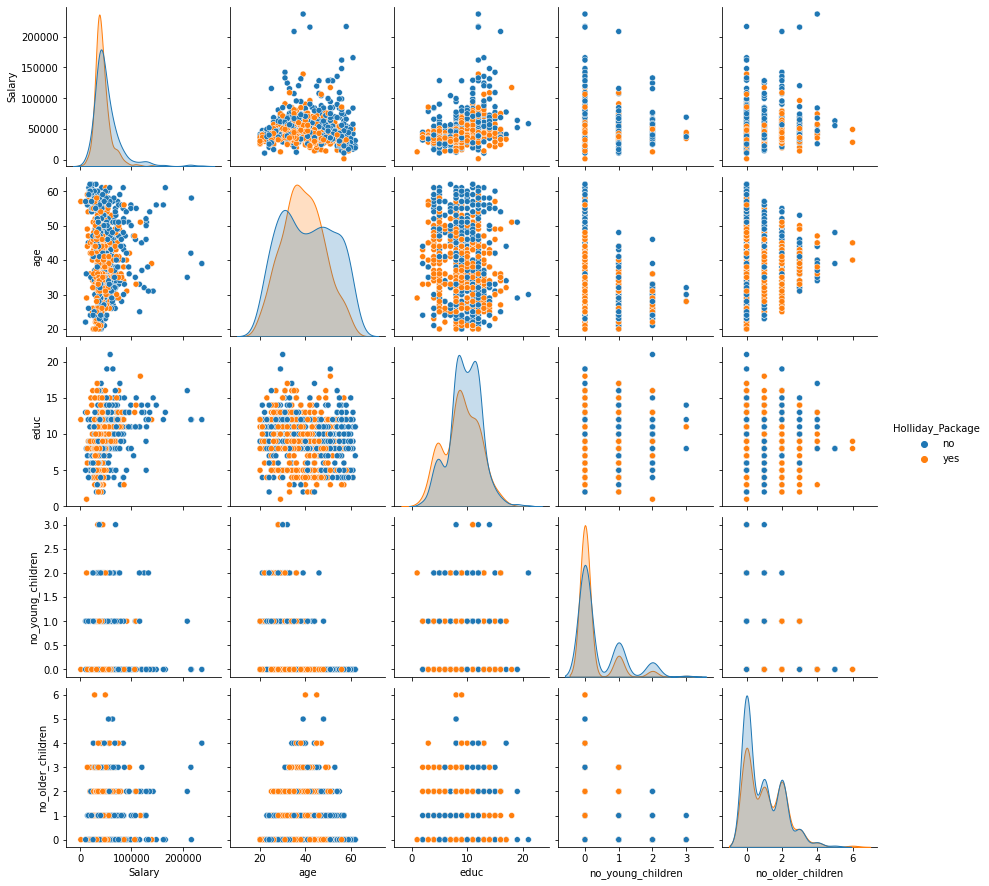

In [86]:
sns.pairplot(data=holiday,hue='Holliday_Package')

1. There is not correlation present in the data 
2. The distribution of holiday package in all the independent variable are overlapping, this might effect the model performance.

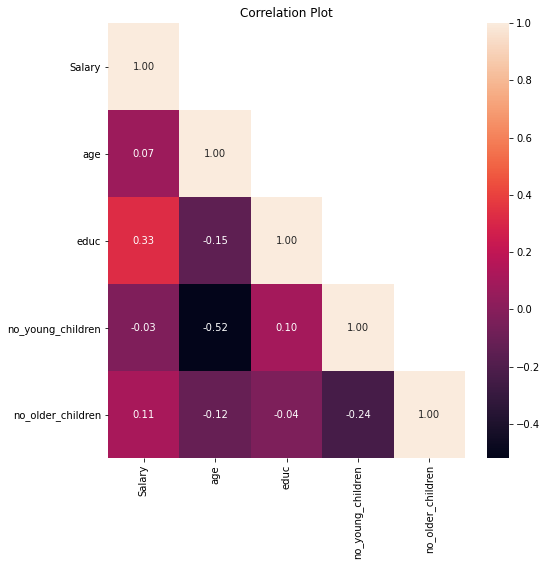

In [87]:
plt.figure(figsize=(8,8))
corr=holiday.corr()
sns.heatmap(corr,annot=True,fmt='0.2f',mask=np.triu(corr,+1))
plt.title('Correlation Plot');

As we saw in the pairplot aslo there is not much correlation present in the independent variables.

##### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

As salary column has the maximum number of outliers present in the data, but salary can be a good predictor whether an employee will buy the holiday package or not. So treating the outliers might affect the model performance.

###### ENCODING THE CATEGORICAL VARIABLE

In [88]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [89]:
holiday['Holliday_Package']=LE.fit_transform(holiday['Holliday_Package'])
holiday['foreign']=LE.fit_transform(holiday['foreign'])

In [90]:
holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


We have assigned 0 and 1's value to categorical variables as well as target variable.

for Holliday_Package 

0 - No , 1 - Yes

for foreign

0 - No , 1 - Yes

##### Checking the proportion of target variable before splillting into test and train data

In [91]:
holiday.Holliday_Package.value_counts(normalize=True)

0    0.540138
1    0.459862
Name: Holliday_Package, dtype: float64

As we can check 0's and 1's are well distributed or balanced.

##### Splitting the data into train and test data into 70:30 

In [92]:
X=holiday.drop('Holliday_Package',axis=1)
y=holiday.pop('Holliday_Package')

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.30, random_state =1)

In [94]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (610, 6)
X_test (262, 6)
y_train (610,)
y_test (262,)


##### BUILDING LOGISTIC REGRESSION MODEL

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve,plot_confusion_matrix

In [96]:
LR = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)

In [97]:
model_lr = LR.fit(X_train,y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.1s finished


In [98]:
grid={'penalty':['l2','none'],
      'solver':['newton-cg','sag'],
      'tol':[0.0001,0.00001]}

In [99]:
LR_new = LogisticRegression(max_iter=10000,n_jobs=2)
grid_search=GridSearchCV(estimator=LR_new,param_grid=grid,cv=3)

In [100]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'sag'],
                         'tol': [0.0001, 1e-05]})

In [101]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='newton-cg')


In [102]:
best_model_lr=grid_search.best_estimator_

##### Predicting on Training and Test datase

In [103]:
ytrain_predict_lr = best_model_lr.predict(X_train)
ytest_predict_lr = best_model_lr.predict(X_test)

##### Getting the Predicted Classes and Probs

In [104]:
ytest_predict_prob_lr=best_model_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_lr).head(10)

,0,1
0,0.753599,0.246401
1,0.287308,0.712692
2,0.888743,0.111257
3,0.974783,0.025217
4,0.499096,0.500904
5,0.738768,0.261232
6,0.904156,0.095844
7,0.665797,0.334203
8,0.462652,0.537348
9,0.635633,0.364367


In [126]:
best_model_lr.coef_

array([[-1.74325968e-05, -5.29573206e-02,  7.15032487e-02,
        -1.45907952e+00, -4.63790375e-02,  1.47623453e+00]])

In [127]:
for idx,col_name in enumerate(X_train.columns):
    print('Coefficient of {} is {}'.format(col_name,best_model_lr.coef_[0][idx]))

Coefficient of Salary is -1.7432596779125227e-05
Coefficient of age is -0.052957320638975
Coefficient of educ is 0.07150324867390781
Coefficient of no_young_children is -1.4590795157272658
Coefficient of no_older_children is -0.04637903746597084
Coefficient of foreign is 1.4762345312794793


In [ ]:
for idx,col_name in enumerate(X_train.columns):
    print('Coefficient of {} is {}'.format(col_name,best_model_lr.coef_[0][idx]))

#### Model Evaluation

In [105]:
accuracy_score(y_train,ytrain_predict_lr)

0.680327868852459

In [106]:
accuracy_score(y_test,ytest_predict_lr)

0.6450381679389313

#### Classification Report for test and train data

In [107]:
print('Classificaion Report for Train Data\n',classification_report(y_train,ytrain_predict_lr))
print(" ")
print('Classificaion Report for Test Data\n',classification_report(y_test,ytest_predict_lr)) 

Classificaion Report for Train Data
               precision    recall  f1-score   support

           0       0.68      0.77      0.72       326
           1       0.69      0.57      0.63       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.68       610

 
Classificaion Report for Test Data
               precision    recall  f1-score   support

           0       0.67      0.70      0.69       145
           1       0.61      0.57      0.59       117

    accuracy                           0.65       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.64      0.65      0.64       262



#### Confussion Matrix for test and train data

Confussion Matrix for Train Data
 [[252  74]
 [121 163]]


Confusion Matrix for Test Data
 [[102  43]
 [ 50  67]]



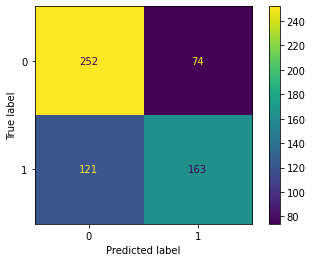

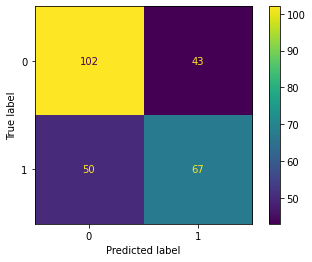

In [108]:
print('Confussion Matrix for Train Data\n',confusion_matrix(y_train,ytrain_predict_lr))
print('')
plot_confusion_matrix(best_model_lr,X_train,y_train);
print('')
print('Confusion Matrix for Test Data\n',confusion_matrix(y_test,ytest_predict_lr))
print('')
plot_confusion_matrix(best_model_lr,X_test,y_test);

#### ROC and AUC curve for Test and Train Data

AUC Value for Train : 0.743


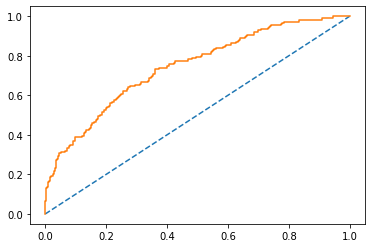

In [109]:
probs=best_model_lr.predict_proba(X_train)
probs=probs[:,1]
auc=roc_auc_score(y_train,probs)
print('AUC Value for Train : %0.3f'%auc)
train_fpr,train_tpr,train_threshold = roc_curve(y_train,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

AUC Value for test : 0.705


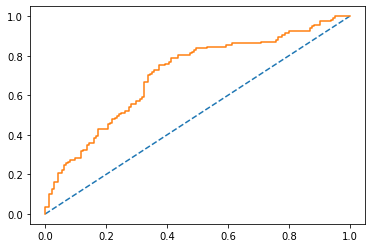

In [110]:
probs=best_model_lr.predict_proba(X_test)
probs=probs[:,1]
auc=roc_auc_score(y_test,probs)
print('AUC Value for test : %0.3f'%auc)
test_fpr,test_tpr,test_threshold = roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr,test_tpr);

### BUILDING LINEAR DISCRIMINANT ANALYSIS MODEL

In [111]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [112]:
LDA = LinearDiscriminantAnalysis()

In [113]:
model_lda=LDA.fit(X_train,y_train)

In [114]:
grid={'solver':['svd','lsqr','eigen']}
grid_search=GridSearchCV(estimator=LDA,param_grid=grid,n_jobs=2)

In [115]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=LinearDiscriminantAnalysis(), n_jobs=2,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']})

In [116]:
print(grid_search.best_params_,'\n',
     grid_search.best_estimator_)

{'solver': 'svd'} 
 LinearDiscriminantAnalysis()


In [117]:
best_model_lda = grid_search.best_estimator_

##### Predicting on Training and Test datase

In [118]:
ytrain_predict_lda = best_model_lda.predict(X_train)
ytest_predict_lda = best_model_lda.predict(X_test)

##### Getting the Predicted Classes and Probs

In [119]:
ytest_predict_prob_lda =model_lda.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_lda).head(10)

,0,1
0,0.736312,0.263688
1,0.277893,0.722107
2,0.887243,0.112757
3,0.967803,0.032197
4,0.523170,0.476830
5,0.739020,0.260980
6,0.889165,0.110835
7,0.674832,0.325168
8,0.397757,0.602243
9,0.641310,0.358690


#### Model Evaluation

In [120]:
accuracy_score(y_train,ytrain_predict_lda)

0.6721311475409836

In [121]:
accuracy_score(y_test,ytest_predict_lda)

0.6412213740458015

#### Classification Report for test and train data

In [122]:
print('Classificaion Report for Train Data\n',classification_report(y_train,ytrain_predict_lda))
print(" ")
print('Classificaion Report for Test Data\n',classification_report(y_test,ytest_predict_lda)) 

Classificaion Report for Train Data
               precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610

 
Classificaion Report for Test Data
               precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



#### Confussion Matrix for test and train data

Confussion Matrix for Train Data
 [[252  74]
 [126 158]]


Confusion Matrix for Test Data
 [[103  42]
 [ 52  65]]



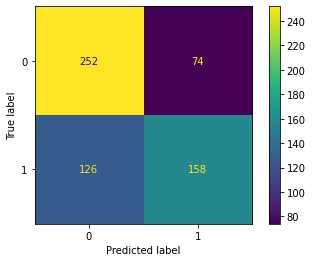

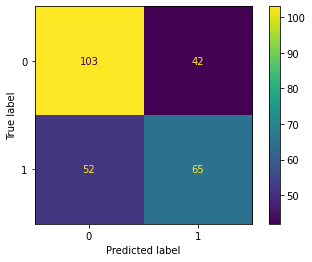

In [123]:
print('Confussion Matrix for Train Data\n',confusion_matrix(y_train,ytrain_predict_lda))
print('')
plot_confusion_matrix(best_model_lda,X_train,y_train);
print('')
print('Confusion Matrix for Test Data\n',confusion_matrix(y_test,ytest_predict_lda))
print('')
plot_confusion_matrix(best_model_lda,X_test,y_test);

#### ROC and AUC curve for Test and Train Data

AUC Value for Train : 0.742


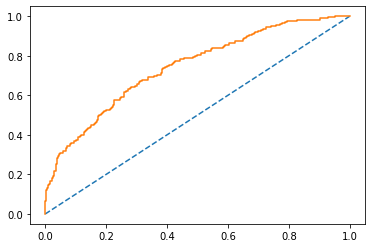

In [124]:
probs_lda=best_model_lda.predict_proba(X_train)
probs_lda=probs_lda[:,1]
auc=roc_auc_score(y_train,probs_lda)
print('AUC Value for Train : %0.3f'%auc)
train_fpr,train_tpr,train_threshold = roc_curve(y_train,probs_lda)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

AUC Value for test : 0.703


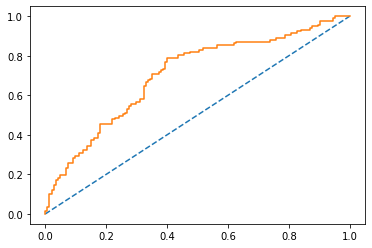

In [125]:
probs_lda=best_model_lda.predict_proba(X_test)
probs_lda=probs_lda[:,1]
auc=roc_auc_score(y_test,probs_lda)
print('AUC Value for test : %0.3f'%auc)
test_fpr,test_tpr,test_threshold = roc_curve(y_test,probs_lda)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr,test_tpr);